In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn


<AxesSubplot:xlabel='wt', ylabel='mpg'>

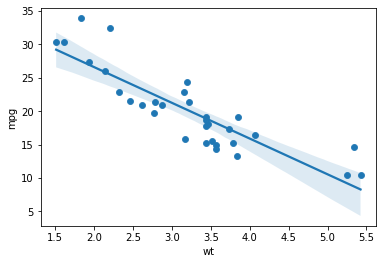

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)

sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)


In [3]:
cars.head()


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
x_list = cars.wt.values
x_list = np.array(x_list, dtype=np.float32).reshape(-1, 1)
x_list


array([[2.62 ],
       [2.875],
       [2.32 ],
       [3.215],
       [3.44 ],
       [3.46 ],
       [3.57 ],
       [3.19 ],
       [3.15 ],
       [3.44 ],
       [3.44 ],
       [4.07 ],
       [3.73 ],
       [3.78 ],
       [5.25 ],
       [5.424],
       [5.345],
       [2.2  ],
       [1.615],
       [1.835],
       [2.465],
       [3.52 ],
       [3.435],
       [3.84 ],
       [3.845],
       [1.935],
       [2.14 ],
       [1.513],
       [3.17 ],
       [2.77 ],
       [3.57 ],
       [2.78 ]], dtype=float32)

In [5]:
y_list = cars.mpg.values
y_list = np.array(y_list, dtype=np.float32)
y_list


array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4],
      dtype=float32)

In [6]:
X = torch.from_numpy(x_list)
Y = torch.tensor(y_list)
X, Y


(tensor([[2.6200],
         [2.8750],
         [2.3200],
         [3.2150],
         [3.4400],
         [3.4600],
         [3.5700],
         [3.1900],
         [3.1500],
         [3.4400],
         [3.4400],
         [4.0700],
         [3.7300],
         [3.7800],
         [5.2500],
         [5.4240],
         [5.3450],
         [2.2000],
         [1.6150],
         [1.8350],
         [2.4650],
         [3.5200],
         [3.4350],
         [3.8400],
         [3.8450],
         [1.9350],
         [2.1400],
         [1.5130],
         [3.1700],
         [2.7700],
         [3.5700],
         [2.7800]]),
 tensor([21.0000, 21.0000, 22.8000, 21.4000, 18.7000, 18.1000, 14.3000, 24.4000,
         22.8000, 19.2000, 17.8000, 16.4000, 17.3000, 15.2000, 10.4000, 10.4000,
         14.7000, 32.4000, 30.4000, 33.9000, 21.5000, 15.5000, 15.2000, 13.3000,
         19.2000, 27.3000, 26.0000, 30.4000, 15.8000, 19.7000, 15.0000, 21.4000]))

In [7]:
w = torch.rand(1, requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

num_epochs = 1000
lr = 1e-03

for epoch in range(num_epochs):
    for i in range(len(X)):
        # forward pass
        y_pred = w*X[i] + b

        # loss calc
        loss = (y_pred-Y[i])**2

        # Gradient Calc
        loss.backward()

        # extract losses
        loss_val = loss.data[0]

        # update weights and biases
        with torch.no_grad():
            w -= w.grad*lr
            b -= b.grad*lr
            w.grad.zero_()
            b.grad.zero_()

    if ((epoch+1) % 100 == 0):
        print(f'epoch: {epoch+1} , loss: {loss_val}')


epoch: 100 , loss: 11.60632038116455
epoch: 200 , loss: 2.969069242477417
epoch: 300 , loss: 0.4790532886981964
epoch: 400 , loss: 0.0037069194950163364
epoch: 500 , loss: 0.10603129118680954
epoch: 600 , loss: 0.31618955731391907
epoch: 700 , loss: 0.5001224875450134
epoch: 800 , loss: 0.6335272192955017
epoch: 900 , loss: 0.7229871153831482
epoch: 1000 , loss: 0.7806752324104309


In [8]:
y_list


array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4],
      dtype=float32)

weights: tensor([-5.2301]), bias: tensor([36.8078])
[23.104954 21.771275 24.673986 19.993036 18.81626  18.711658 18.136347
 20.123789 20.332993 18.81626  18.81626  15.52129  17.299528 17.038023
  9.349758  8.43972   8.852898 25.3016   28.361214 27.21059  23.915619
 18.397852 18.842411 16.724216 16.698065 26.68758  25.615406 28.894686
 20.22839  22.320435 18.136347 22.268135]


<AxesSubplot:>

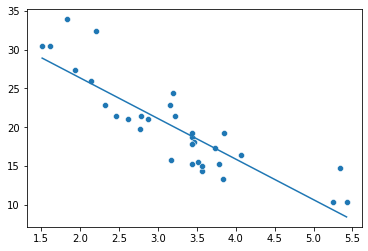

In [9]:
print(f'weights: {w.data}, bias: {b.data}')

y_pred = (w*X + b).detach().numpy()
print(y_pred.reshape(-1))
sns.scatterplot(x=x_list.reshape(-1), y=y_list)
sns.lineplot(x=x_list.reshape(-1), y=y_pred.reshape(-1))


In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_list, y_list)
print(f'slope: {reg.coef_} intercept: {reg.intercept_}')


slope: [-5.3444715] intercept: 37.285125732421875


In [11]:
# from torchviz import make_dot
# import os
# os.environ['PATH'] += os.pathsep+"C:/Program Files (x86)/Graphviz/bin"
# make_dot(loss)


## Model CLass

In [12]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred


inputd = outputd = 1
model = LinearRegressionTorch(inputd, outputd)


In [17]:
loss_func = nn.MSELoss()
lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

losses, slope, bias = [], [], []

X = torch.from_numpy(x_list.astype(np.float32)).reshape(-1,1)
Y_true = torch.from_numpy(y_list.astype(np.float32)).reshape(-1,1)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()  # Set gradients to 0

    # forward pass
    y_pred = model(X)

    # compute loss
    loss = loss_func(y_pred, Y_true)
    loss.backward()

    # update weights
    optimizer.step()

    # get params
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == "linear.weight":
                slope.append(param.data.numpy()[0][0])
            if name == "linear.bias":
                bias.append(param.data.numpy()[0])

    # store loss
    losses.append(float(loss.data))

    if ((epoch+1) % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 99, Loss: 39.206451416015625
Epoch 199, Loss: 25.291332244873047
Epoch 299, Loss: 17.72292137145996
Epoch 399, Loss: 13.606454849243164
Epoch 499, Loss: 11.367502212524414
Epoch 599, Loss: 10.149738311767578
Epoch 699, Loss: 9.48740005493164
Epoch 799, Loss: 9.127157211303711
Epoch 899, Loss: 8.931219100952148
Epoch 999, Loss: 8.82464599609375


<AxesSubplot:>

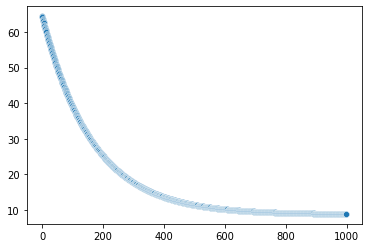

In [18]:
# Visualize loss over each epoch
sns.scatterplot(x=range(epochs), y=losses)

<AxesSubplot:>

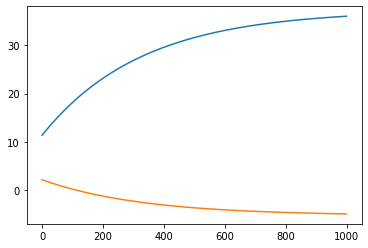

In [19]:
# Visualize the bias development and slope development
sns.lineplot(x=range(epochs), y=bias)
sns.lineplot(x=range(epochs), y=slope)

<AxesSubplot:>

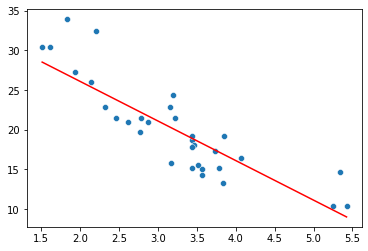

In [20]:
# check results
y_pred = model(torch.tensor(x_list)).data.numpy().reshape(-1)
sns.scatterplot(x=x_list.reshape(-1), y=y_list)
sns.lineplot(x=x_list.reshape(-1), y=y_pred,color="red")

